In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
df = pd.read_csv('DL_LAB_EXAM/DL_LAB_EXAM/Datasets/A_Z Handwritten Data.csv')

print(df.head())
print(df.shape)
print(df.columns)


   0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  0.641  \
0  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
3  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.642  0.643  0.644  0.645  0.646  0.647  0.648  
0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0  

[5 rows x 785 columns]
(372450, 785)
Index(['0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9',
       ...
       '0.639', '0.640', '0.641', '0.642', '0.643', '0.644', '0.645', '0.646',
    

In [3]:
X = df.iloc[:, 1:].values.astype('float32') / 255.0  
y = df.iloc[:, 0].values  


In [4]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)


In [6]:
dnn = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    Dense(256, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])

dnn.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

dnn_history = dnn.fit(X_train, y_train, batch_size=64, epochs=20, validation_data=(X_test, y_test))


C:\Users\Omkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 31s 7ms/step - accuracy: 0.9026 - loss: 0.3456 - val_accuracy: 0.9695 - val_loss: 0.1032
Epoch 2/20
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 29s 6ms/step - accuracy: 0.9759 - loss: 0.0803 - val_accuracy: 0.9783 - val_loss: 0.0723
Epoch 3/20
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 30s 7ms/step - accuracy: 0.9835 - loss: 0.0537 - val_accuracy: 0.9803 - val_loss: 0.0652
Epoch 4/20
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 30s 6ms/step - accuracy: 0.9874 - loss: 0.0397 - val_accuracy: 0.9849 - val_loss: 0.0570
Epoch 5/20
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 34s 7ms/step - accuracy: 0.9901 - loss: 0.0314 - val_accuracy: 0.9828 - val_loss: 0.0621
Epoch 6/20
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 30s 7ms/step - accuracy: 0.9912 - loss: 0.0270 - val_accuracy: 0.9840 - val_loss: 0.0663
Epoch 7/20
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 31s 7ms/step - accuracy: 0.9923 - loss: 0.0240 - val_accuracy: 0.9873 - val_loss: 0.0546
Epoch 8/20
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 30s 7ms/step - accuracy: 0.9930 - loss: 0

In [7]:
X_train_cnn = X_train.reshape(-1, 28, 28, 1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)

cnn = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])

cnn.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

cnn_history = cnn.fit(X_train_cnn, y_train, batch_size=64, epochs=20, validation_data=(X_test_cnn, y_test))


C:\Users\Omkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 75s 16ms/step - accuracy: 0.9157 - loss: 0.3010 - val_accuracy: 0.9825 - val_loss: 0.0640
Epoch 2/20
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 67s 14ms/step - accuracy: 0.9834 - loss: 0.0577 - val_accuracy: 0.9871 - val_loss: 0.0466
Epoch 3/20
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 70s 15ms/step - accuracy: 0.9890 - loss: 0.0379 - val_accuracy: 0.9891 - val_loss: 0.0401
Epoch 4/20
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 72s 16ms/step - accuracy: 0.9925 - loss: 0.0248 - val_accuracy: 0.9897 - val_loss: 0.0368
Epoch 5/20
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 67s 14ms/step - accuracy: 0.9944 - loss: 0.0178 - val_accuracy: 0.9918 - val_loss: 0.0312
Epoch 6/20
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 67s 14ms/step - accuracy: 0.9957 - loss: 0.0133 - val_accuracy: 0.9899 - val_loss: 0.0402
Epoch 7/20
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 65s 14ms/step - accuracy: 0.9963 - loss: 0.0116 - val_accuracy: 0.9921 - val_loss: 0.0326
Epoch 8/20
4656/4656 ━━━━━━━━━━━━━━━━━━━━ 72s 15ms/step - accuracy: 0.9970 -

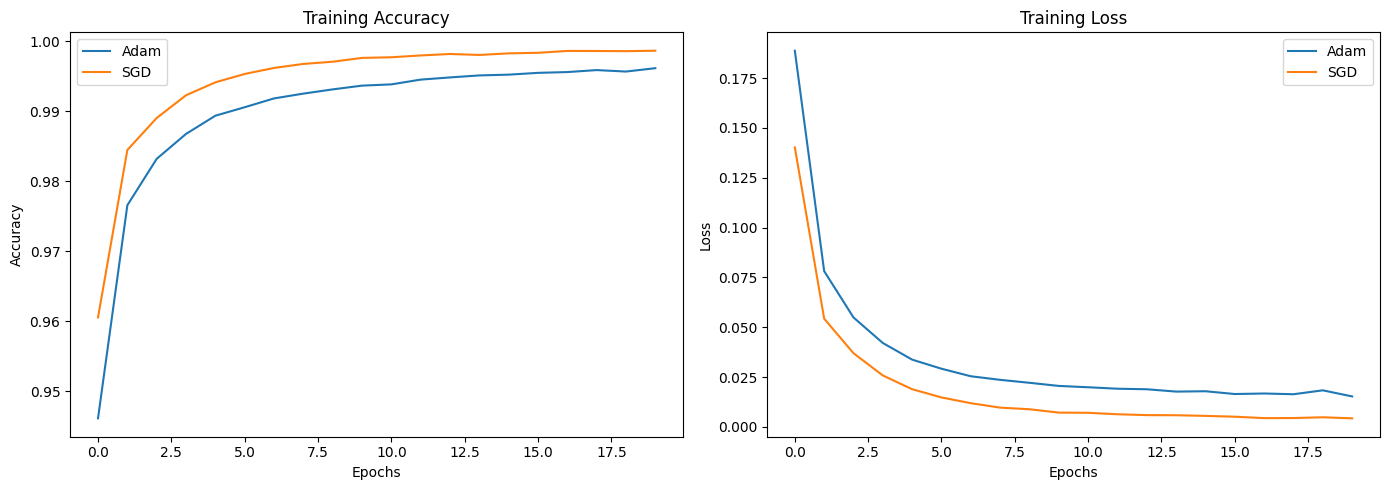

In [8]:

plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(dnn_history.history['accuracy'], label='Adam')
plt.plot(cnn_history.history['accuracy'], label='SGD')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(dnn_history.history['loss'], label='Adam')
plt.plot(cnn_history.history['loss'], label='SGD')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
